# ***Food Classification using Deep Learning***

# ***Load and Prepare data***

In [ ]:
!pip install -Uqq fastai
from fastai.vision.all import *

In [3]:
foodPath = untar_data(URLs.FOOD)

In [4]:
get_files(foodPath)


(#101017) [Path('/root/.fastai/data/food-101/labels.txt'),Path('/root/.fastai/data/food-101/classes.txt'),Path('/root/.fastai/data/food-101/train.json'),Path('/root/.fastai/data/food-101/test.json'),Path('/root/.fastai/data/food-101/train.txt'),Path('/root/.fastai/data/food-101/test.txt'),Path('/root/.fastai/data/food-101/h5/food_test_c101_n1000_r64x64x1.h5'),Path('/root/.fastai/data/food-101/h5/food_test_c101_n1000_r32x32x3.h5'),Path('/root/.fastai/data/food-101/h5/food_c101_n10099_r64x64x1.h5'),Path('/root/.fastai/data/food-101/h5/food_test_c101_n1000_r128x128x1.h5')...]

<Axes: >

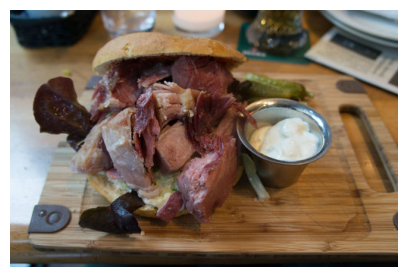

In [5]:
# get_files(foodPath)
# get_image_files(foodPath)
img = PILImage.create('/root/.fastai/data/food-101/images/pulled_pork_sandwich/3757265.jpg')
img.show()

In [6]:
#How many images
len(get_image_files(foodPath))

101000

In [7]:
pd.set_option("display.max_columns", None)
pd.read_json('/root/.fastai/data/food-101/train.json').shape
pd.read_json('/root/.fastai/data/food-101/train.json').head()

churros          hot_and_sour_soup          samosa  \
0  churros/1004234  hot_and_sour_soup/1002782  samosa/1008131   
1  churros/1013460  hot_and_sour_soup/1003688  samosa/1011601   
2  churros/1016791  hot_and_sour_soup/1008185   samosa/101365   
3   churros/102100  hot_and_sour_soup/1008701  samosa/1015943   
4  churros/1025494  hot_and_sour_soup/1008924  samosa/1016296   

           sashimi          pork_chop          spring_rolls  \
0  sashimi/1001239  pork_chop/1000802  spring_rolls/1002160   
1  sashimi/1001363  pork_chop/1006233  spring_rolls/1003056   
2  sashimi/1002556  pork_chop/1019530  spring_rolls/1003507   
3  sashimi/1007253  pork_chop/1019569  spring_rolls/1008736   
4  sashimi/1010510  pork_chop/1025391  spring_rolls/1012525   

           panna_cotta          beef_tartare          greek_salad  \
0  panna_cotta/1001332  beef_tartare/1000431  greek_salad/1007149   
1  panna_cotta/1003460  beef_tartare/1005746  greek_salad/1009138   
2  panna_cotta/1011097  beef_tartare/1009672  greek_salad/1010520   
3  panna_cotta/1013000  beef_tartare/1012128  greek_salad/1011665   
4  panna_cotta/1020036  beef_tartare/1027680  greek_salad/1012989   

           foie_gras          tacos          pad_thai          poutine  \
0  foie_gras/1004944  tacos/1002217  pad_thai/1004763  poutine/1005364   
1  foie_gras/1008577  tacos/1005454  pad_thai/1009595  poutine/1019904   
2  foie_gras/1011711  tacos/1007867  pad_thai/1011059  poutine/1028984   
3  foie_gras/1017233  tacos/1015285  pad_thai/1011238   poutine/102911   
4  foie_gras/1023512  tacos/1023154  pad_thai/1013966  poutine/1036670   

           ramen          pulled_pork_sandwich          bibimbap  \
0  ramen/1002305  pulled_pork_sandwich/1004064  bibimbap/1002297   
1  ramen/1002843  pulled_pork_sandwich/1005662  bibimbap/1006709   
2  ramen/1004562  pulled_pork_sandwich/1008770  bibimbap/1009730   
3   ramen/101297  pulled_pork_sandwich/1037387  bibimbap/1011217   
4  ramen/1014141  pulled_pork_sandwich/1040750  bibimbap/1014434   

           beignets          apple_pie          crab_cakes          risotto  \
0  beignets/1000911  apple_pie/1005649   crab_cakes/100038  risotto/1004412   
1  beignets/1002569  apple_pie/1014775  crab_cakes/1003375  risotto/1009354   
2  beignets/1005233  apple_pie/1026328  crab_cakes/1006485  risotto/1014631   
3  beignets/1011780  apple_pie/1028787  crab_cakes/1013559  risotto/1017141   
4  beignets/1019643  apple_pie/1043283  crab_cakes/1026455  risotto/1018227   

           paella          steak          baby_back_ribs          miso_soup  \
0  paella/1000388  steak/1000205  baby_back_ribs/1005293  miso_soup/1032814   
1  paella/1000412   steak/100135  baby_back_ribs/1007102  miso_soup/1038398   
2  paella/1004897   steak/101312  baby_back_ribs/1007272  miso_soup/1043862   
3  paella/1018124  steak/1021458  baby_back_ribs/1008749  miso_soup/1046478   
4  paella/1028277  steak/1032846  baby_back_ribs/1009028  miso_soup/1050730   

           frozen_yogurt          club_sandwich          carrot_cake  \
0  frozen_yogurt/1000735  club_sandwich/1017761  carrot_cake/1000447   
1   frozen_yogurt/100093  club_sandwich/1020435  carrot_cake/1003032   
2  frozen_yogurt/1014166   club_sandwich/102978  carrot_cake/1011021   
3  frozen_yogurt/1017177   club_sandwich/102996  carrot_cake/1024932   
4  frozen_yogurt/1017511  club_sandwich/1040746  carrot_cake/1038934   

           falafel          bread_pudding          chicken_wings  \
0  falafel/1003181  bread_pudding/1004499  chicken_wings/1003533   
1  falafel/1008896  bread_pudding/1004540  chicken_wings/1008504   
2  falafel/1016116  bread_pudding/1006034  chicken_wings/1009927   
3   falafel/102463   bread_pudding/100939   chicken_wings/101104   
4  falafel/1033721  bread_pudding/1018769  chicken_wings/1012615   

           gnocchi          caprese_salad          creme_brulee  \
0   gnocchi/100409  caprese_salad/1001946  creme_brulee/1000711   
1   gnocchi/100680  caprese_salad/1024778  cre

In [8]:
# Classification
labelA = 'samosa'
labelB = 'churros'

Labels = ['samosa','churros','sushi','tacos','pizza','tiramisu','cheesecake','ice_cream','donuts','pancakes']

# ***Data Preparation***

1.   Removing all images that don't have labelA to labelJ
2.   Renaming images with labelA to labelJ to have that label in their filename

In [12]:
# Create a dictionary to count the number of images renamed by label
label_counts = defaultdict(int)
k=0
for img in get_image_files(foodPath):
    renamed = False

    # Go through the list of labels and check if they are in the image name
    for label in Labels:
        if label in str(img):
            img.rename(f"{img.parent}/{label}-{img.name}")
            label_counts[label] += 1
            renamed = True

    if not renamed:
        k +=1
        os.remove(img)


print(k)
print(len(get_image_files(foodPath)))
# Show the number of renamed images for each label
for label, count in label_counts.items():
    print(f"{label}: {count} images renommées")

91000
10000
pizza: 1000 images renommées
donuts: 1000 images renommées
tiramisu: 1000 images renommées
churros: 1000 images renommées
ice_cream: 1000 images renommées
samosa: 1000 images renommées
cheesecake: 1000 images renommées
sushi: 1000 images renommées
tacos: 1000 images renommées
pancakes: 1000 images renommées


# ***Train Model***

In [13]:
def GetLabel(fileName):
  return fileName.split('-')[0]

GetLabel("churros-734186.jpg") #Testing

'churros'

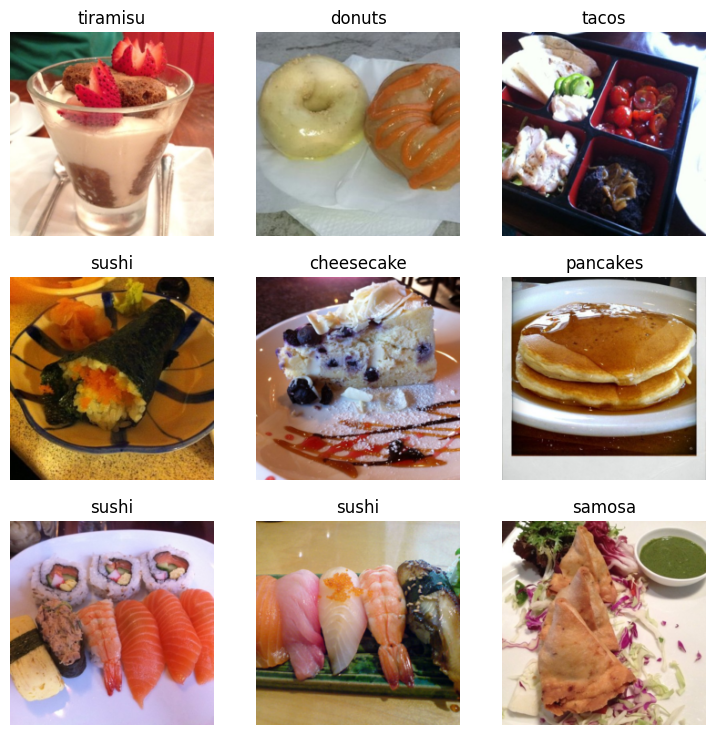

In [14]:
dls = ImageDataLoaders.from_name_func(
    foodPath, get_image_files(foodPath), valid_pct=0.2, seed=420,
    label_func=GetLabel, item_tfms=Resize(224)
)
dls.train.show_batch()

In [15]:
learn = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=20)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

# ***Verify Model***

Saving piz.jpg to piz.jpg


pizza  100%


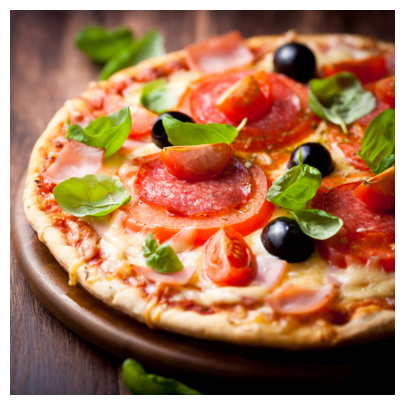

In [34]:
from google.colab import files
uploader = files.upload()

for img in uploader.items():
  uploadedImg = img[0]

img = PILImage.create(uploadedImg)
img.show()

label,_,probs = learn.predict(img)

print(f'{label}  {torch.max(probs).item()*100:.0f}%')

# ***Testing Model***

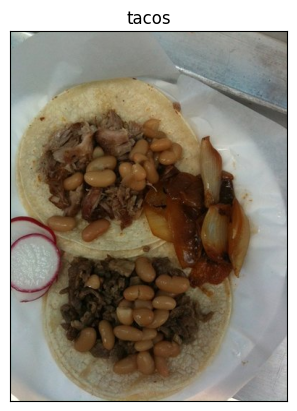

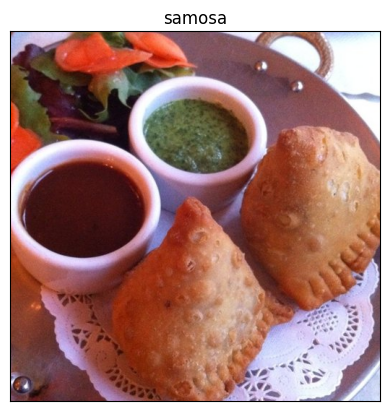

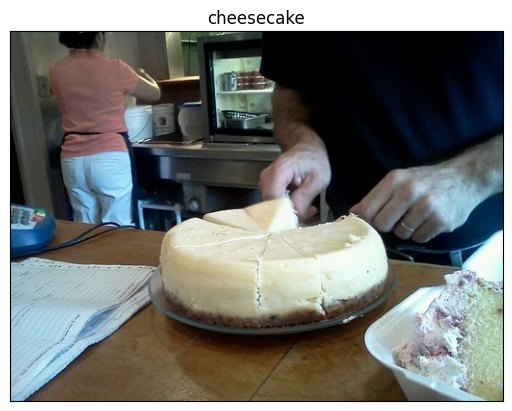

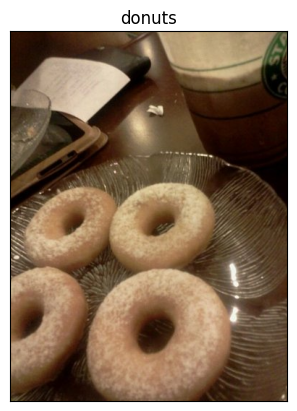

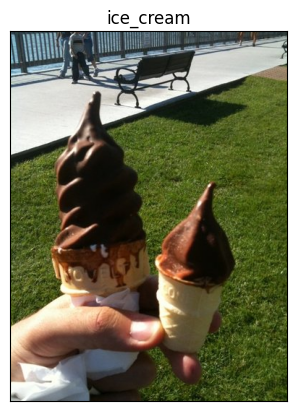

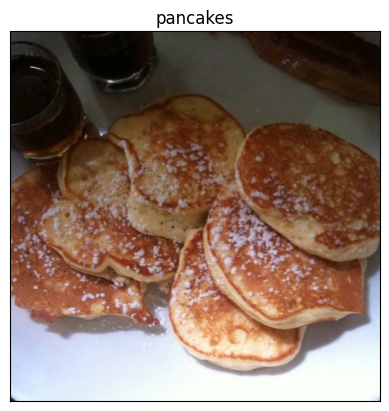

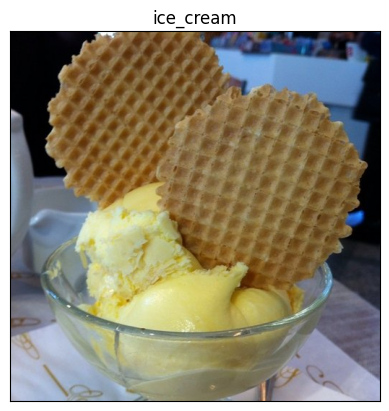

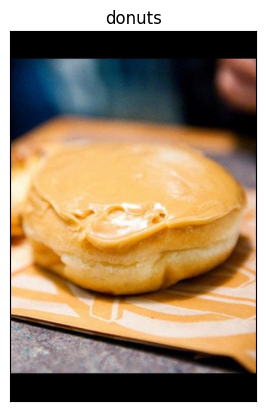

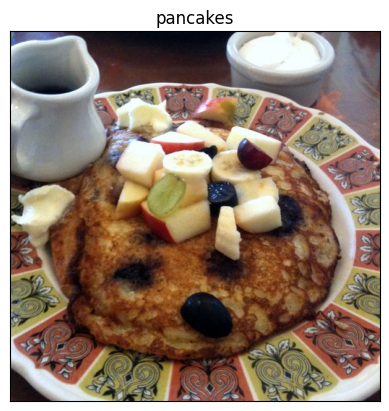

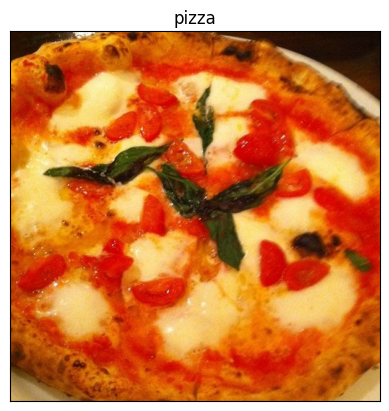

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0,10):
  #Load random image
  randomIndex = random.randint(0, len(get_image_files(foodPath))-1)
  img = mpimg.imread(get_image_files(foodPath)[randomIndex])
  #Put into Model
  label,_,probs = learn.predict(img)

  #Create Figure using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot() #Add Subplot (For multiple images)
  imgplot = plt.imshow(img) #Add Image into Plot
  ax.set_title(label) #Set Headline to predicted label

  #Hide numbers on axes
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)

# ***Confusion Matrix***

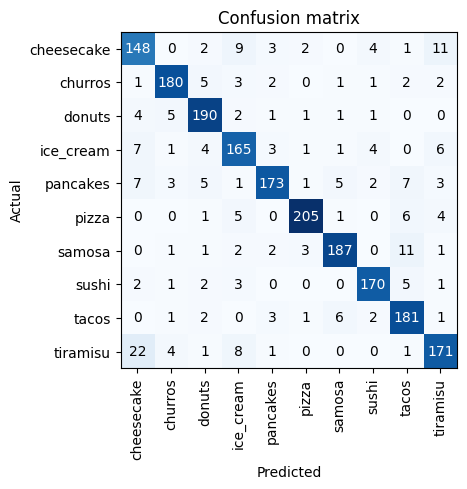

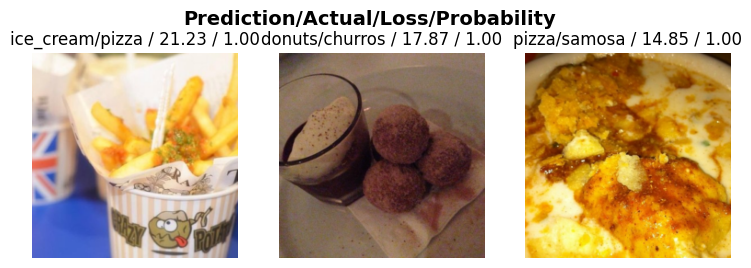

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(3)

# ***Deploy***

In [26]:
learn.export() #exports model as 'export.pkl' by default

In [27]:
#let's grab the first pkl file we can find
modelPath = get_files(foodPath, '.pkl')[0]
modelPath

Path('/root/.fastai/data/food-101/export.pkl')

In [28]:
learn_inf = load_learner(modelPath)
learn_inf.predict(mpimg.imread(get_image_files(foodPath)[0])) #raw prediction

('pizza',
 tensor(5),
 tensor([3.3840e-08, 1.8969e-10, 8.8219e-11, 3.3208e-10, 1.2994e-08, 1.0000e+00,
         1.6110e-10, 1.4692e-09, 8.5400e-10, 3.5678e-09]))

In [29]:
learn_inf.dls.vocab #Get the labels

['cheesecake', 'churros', 'donuts', 'ice_cream', 'pancakes', 'pizza', 'samosa', 'sushi', 'tacos', 'tiramisu']

In [30]:
#This seems to only work properly in Chrome
from google.colab import files
files.download(modelPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>